In [26]:
import re
import pandas as pd

data = []

line = "[I 2024-04-27 15:57:57,729] Finished trial#0 with value: 0.7033666666666666 with parameters: {'remove_pct': 10, 'add_pct': 34, 'dataset': 'citeseer', 'i': '1_manhattan', 'gnn': 'gcn', 'eval_orig': 0}. Best is trial#0 with value: 0.7033666666666666."

pattern = r"Finished trial#\d+ with value: ([\d\.]+) with parameters: {'remove_pct': (\d+), 'add_pct': (\d+)"

match = re.search(pattern, line)
if match:
    data.append((int(match.group(2)), int(match.group(3)), float(match.group(1))))


df = pd.DataFrame(data, columns=['remove_pct', 'add_pct', 'finished_value'])

print(df)


   remove_pct  add_pct  finished_value
0          10       34        0.703367


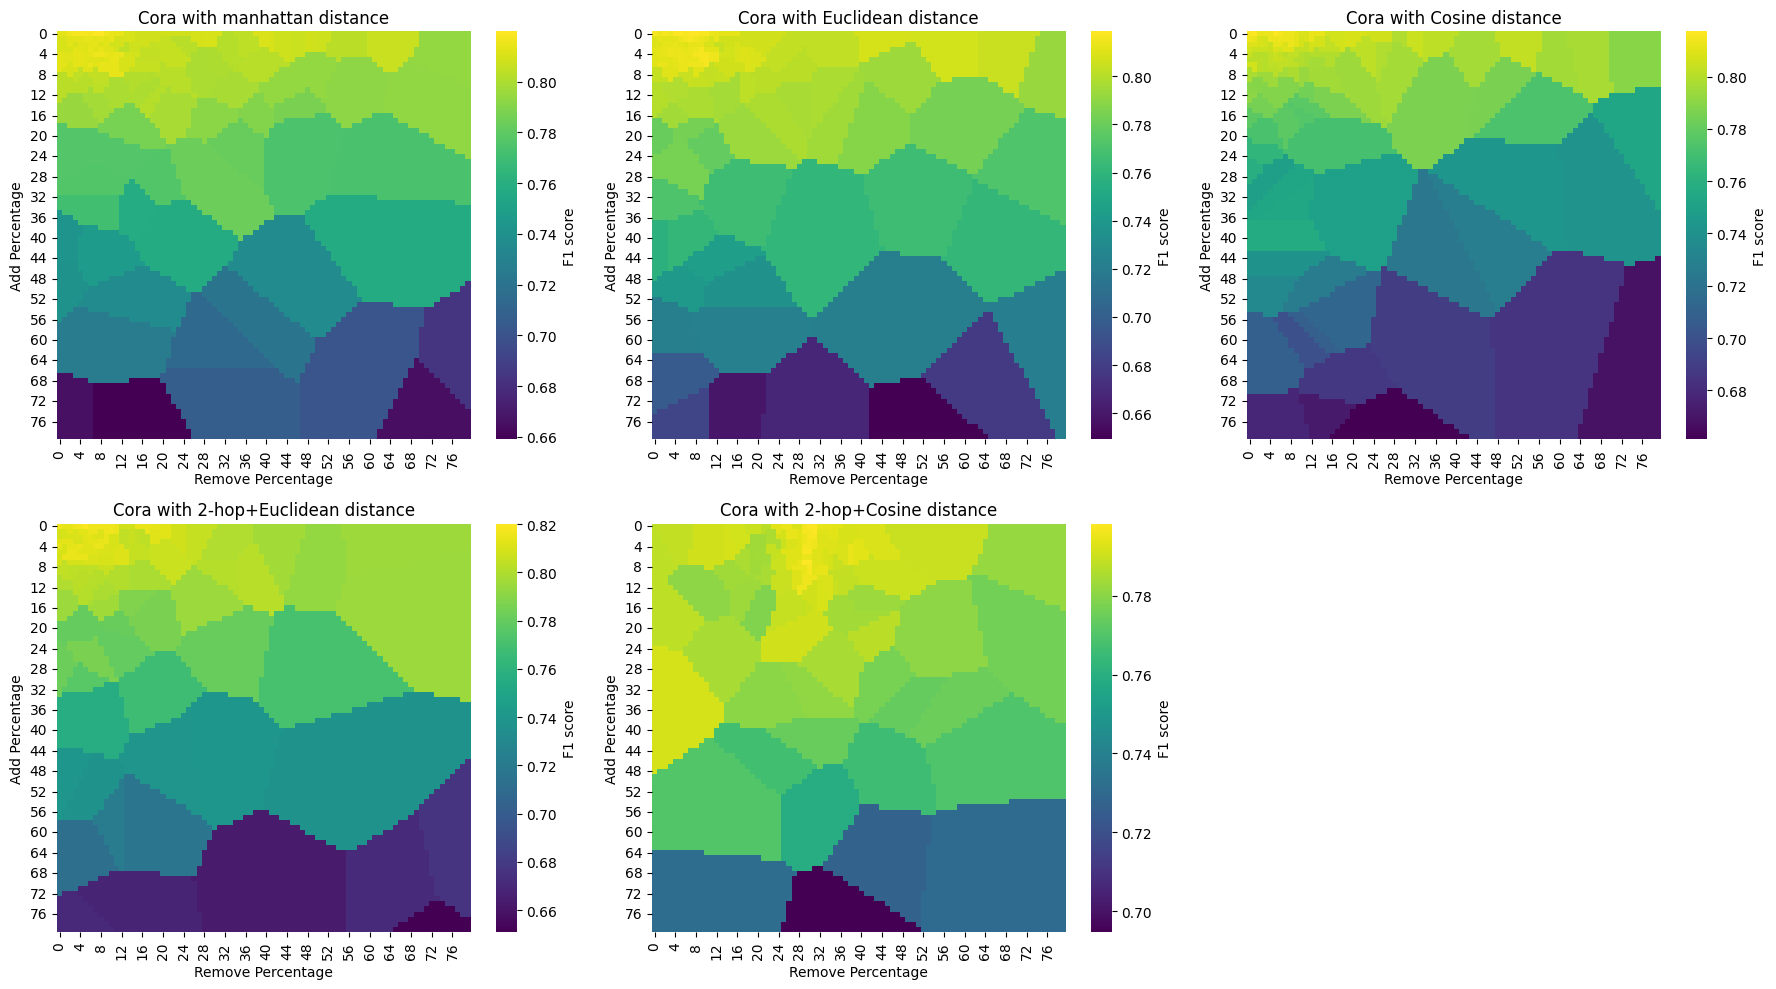

In [48]:
pattern = r"Finished trial#\d+ with value: ([\d\.]+) with parameters: {'remove_pct': (\d+), 'add_pct': (\d+)"
data = []
files_to_names = {
    'manhattan_error_1.txt': 'manhattan',
    'euclidean_error_1.txt': 'Euclidean',
    'output_cora_theta.log': 'Cosine',
    'euc_cora_2hop.txt': '2-hop+Euclidean',
    'output_cora_theta_2.log': '2-hop+Cosine'
}
plt.figure(figsize=(18, 10))

plot_number = 1

for f, n in files_to_names.items():
    data = []  
    with open(f, 'r') as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                data.append((int(match.group(2)), int(match.group(3)), float(match.group(1))))

    df = pd.DataFrame(data, columns=['remove_pct', 'add_pct', 'finished_value'])
    
    grid_x, grid_y = np.mgrid[0:80:80j, 0:80:80j]
    grid_z = griddata((df['remove_pct'], df['add_pct']), df['finished_value'], (grid_x, grid_y), method='nearest')
    
    ax = plt.subplot(2, 3, plot_number)
    sns.heatmap(grid_z, cmap='viridis', cbar_kws={'label': 'F1 score'}, ax=ax)
    ax.set_title(f'Cora with {n} distance')
    ax.set_xlabel('Remove Percentage')
    ax.set_ylabel('Add Percentage')

    plot_number += 1

plt.tight_layout()
plt.show()

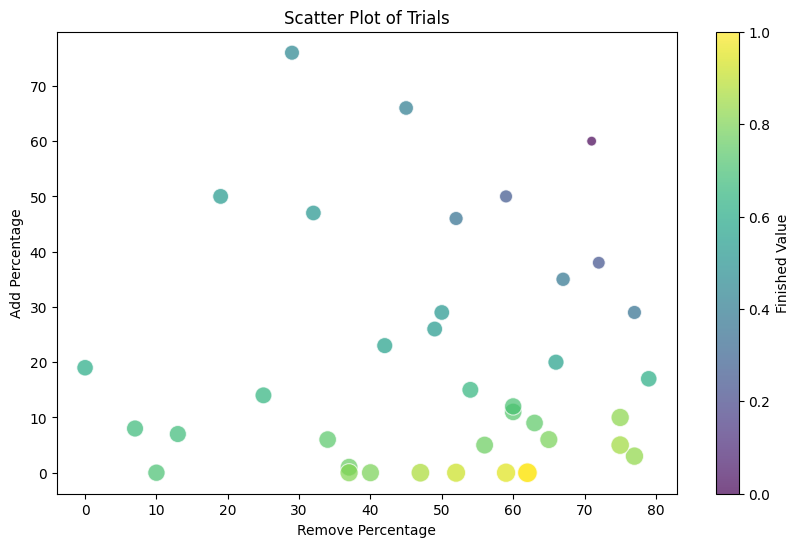

In [37]:
data = []
with open('blog_eu.txt', 'r') as file:
    for line in file:
        match = re.search(pattern, line)
        if match:
            data.append((int(match.group(2)), int(match.group(3)), float(match.group(1))))
df = pd.DataFrame(data, columns=['remove_pct', 'add_pct', 'finished_value'])


plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x='remove_pct',
    y='add_pct',
    hue='finished_value',
    palette='viridis',  
    size='finished_value',
    sizes=(50, 200), 
    legend="full",
    alpha=0.7
)

# Enhancing the plot
plt.title('Scatter Plot of Trials')
plt.xlabel('Remove Percentage')
plt.ylabel('Add Percentage')
plt.colorbar(scatter.collections[0], label='Finished Value') 
scatter.legend_.remove()  

# Show the plot
plt.show()